# Importación de bibliotecas

In [1]:
import os
from os import listdir
from os.path import isfile,isdir, join


from glob import glob
import numpy as np
import pandas as pd
import tensorflow as tf
#import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import keras
from keras.preprocessing import image
from keras import layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD

#pip install sklearn
#pip install scikit-image
from sklearn.model_selection import train_test_split
#from skimage import color, io
#from scipy.misc import imresize  ## deprecated
from PIL import Image

import datetime

Using TensorFlow backend.


# Carga de imágenes

In [11]:
#Tamaño de la imagen
ih, iw = 224, 224
#Forma de la imagen: alto, ancho y número de canales
input_shape = (ih, iw, 3)


#Número de clases
num_class = 12
#Cuantas veces entrenar
epochs = 30


# Batch para hacer cada entrenamiento.
# Lee 50 'batch_size' imagenes antes de actualizar los parametros.
# Las carga a memoria
batch_size = 50 #1


# Número de imagenes en train
num_train = 2000 #18632
#Número de imagenes en test
num_test = 200


epoch_steps = num_train // batch_size
test_steps = num_test // batch_size


""" Imágenes de entrenamiento """
train_f = pd.read_csv('train.csv')

gentrain = ImageDataGenerator(rescale = 1. / 255)

train_ds = gentrain.flow_from_dataframe(train_f,directory = 'minitrain_images',
                                             x_col = 'image',
                                             y_col = 'labels',
                                             batch_size=batch_size,
                                             target_size=(iw, ih),
                                             class_mode = 'categorical')

print(train_ds.class_indices)

""" Imágenes de prueba """

test_f = pd.read_csv('train.csv')

gentest = ImageDataGenerator(rescale=1. / 255)

test_ds = gentest.flow_from_dataframe(test_f,directory = 'minitest_images',
                                             x_col = 'image',
                                             y_col = 'labels',
                                             batch_size=batch_size,
                                             target_size=(iw, ih),
                                             class_mode = 'categorical')

print(test_ds.class_indices)

#para cargar pesos de la red desde donde se quedó la ultima vez
#filename = "cvsd.h5"
#model.load_weights(filename)  #comentar si se comienza desde cero.
###



Found 2000 validated image filenames belonging to 12 classes.
{'complex': 0, 'frog_eye_leaf_spot': 1, 'frog_eye_leaf_spot complex': 2, 'healthy': 3, 'powdery_mildew': 4, 'powdery_mildew complex': 5, 'rust': 6, 'rust complex': 7, 'rust frog_eye_leaf_spot': 8, 'scab': 9, 'scab frog_eye_leaf_spot': 10, 'scab frog_eye_leaf_spot complex': 11}
Found 200 validated image filenames belonging to 12 classes.
{'complex': 0, 'frog_eye_leaf_spot': 1, 'frog_eye_leaf_spot complex': 2, 'healthy': 3, 'powdery_mildew': 4, 'powdery_mildew complex': 5, 'rust': 6, 'rust complex': 7, 'rust frog_eye_leaf_spot': 8, 'scab': 9, 'scab frog_eye_leaf_spot': 10, 'scab frog_eye_leaf_spot complex': 11}


# Modelo y entrenamiento

In [12]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(ih, iw,3))) #50, 50
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(12))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbCallBack = keras.callbacks.TensorBoard(log_dir=log_dir,
                                         histogram_freq=1, 
                                         write_graph=True, 
                                         write_images=True)
#python -m tensorboard.main --logdir=/Graph  <- Para correr Tensor board
#tensorboard  --logdir Graph/
print('Logs:')
print(log_dir)
print('______________________________________________________________')


history = model.fit_generator(
                train_ds,
                steps_per_epoch=epoch_steps,
                epochs=epochs,
                validation_data=test_ds,
                validation_steps=test_steps,
                callbacks=[tbCallBack]
                )

Logs:
logs/fit/20220508-005547
______________________________________________________________
Epoch 1/30
40/40 [==============================] - 4450s 111s/step - loss: 2.1214 - accuracy: 0.2525 - val_loss: 1.8534 - val_accuracy: 0.2750
Epoch 2/30
40/40 [==============================] - 4417s 110s/step - loss: 1.8946 - accuracy: 0.3025 - val_loss: 1.7402 - val_accuracy: 0.3700
Epoch 3/30
40/40 [==============================] - 4390s 110s/step - loss: 1.7517 - accuracy: 0.3780 - val_loss: 1.6742 - val_accuracy: 0.3700
Epoch 4/30
40/40 [==============================] - 4476s 112s/step - loss: 1.6851 - accuracy: 0.3980 - val_loss: 1.6332 - val_accuracy: 0.4100
Epoch 5/30
40/40 [==============================] - 4396s 110s/step - loss: 1.6108 - accuracy: 0.4325 - val_loss: 1.6773 - val_accuracy: 0.4000
Epoch 6/30
40/40 [==============================] - 4377s 109s/step - loss: 1.5627 - accuracy: 0.4385 - val_loss: 1.6992 - val_accuracy: 0.3550
Epoch 7/30
40/40 [========================

## Guardando los pesos

In [13]:
model.save_weights('Conv2D_weights.h5')

# Resumen del modelo y gráficas

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


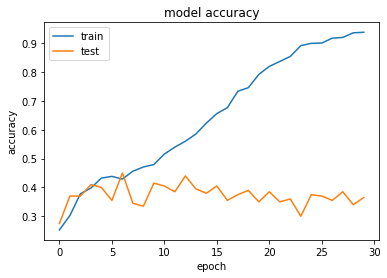

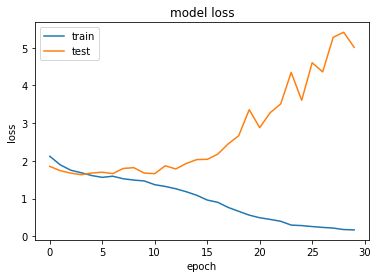

In [15]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Conv2D_accuracy.svg')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Conv2D_loss.svg')
plt.show()